In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r"C:\Users\e0280497\Documents\Python\Instacart Basket Analysis"
ords_prods_cust= pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data','ords_prods_cust.pkl'))

### 02. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

#### Bar chart:

Text(55.847222222222214, 0.5, 'Frequency')

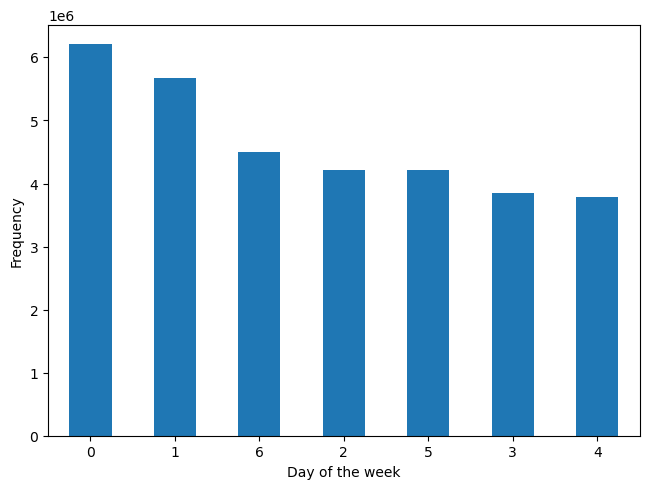

In [6]:
bar = ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Day of the week')
plt.ylabel('Frequency')

Text(55.847222222222214, 0.5, 'Frequency')

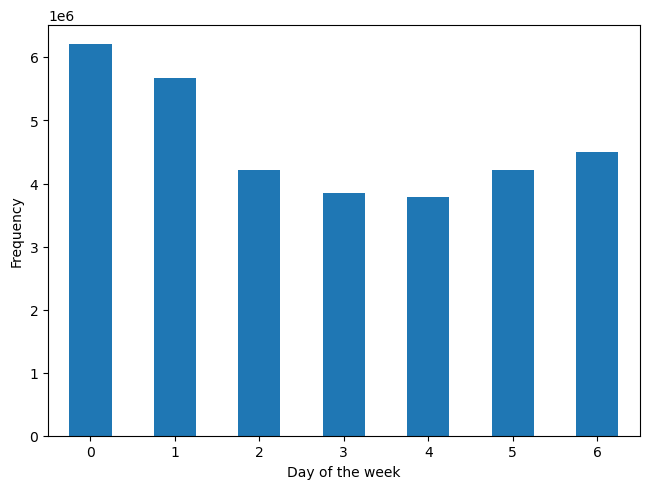

In [7]:
# not sorted
bar_ns= ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Day of the week')
plt.ylabel('Frequency')

Text(55.847222222222214, 0.5, 'Frequency')

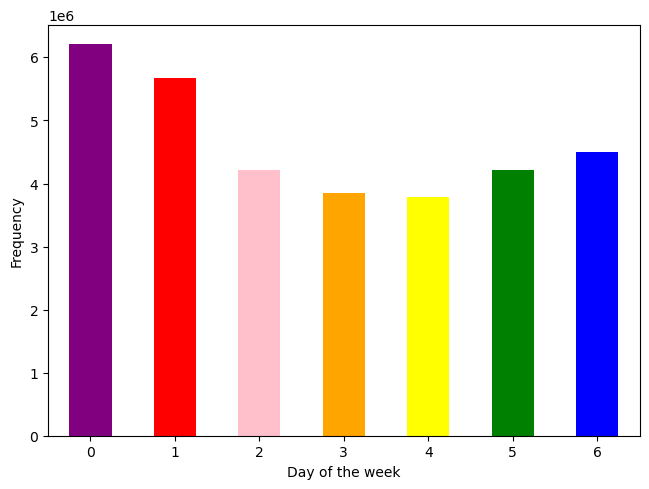

In [8]:
# add color to bars
bar_color = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Day of the week')
plt.ylabel('Frequency')

#### Histograms

Text(0, 0.5, 'Frequency')

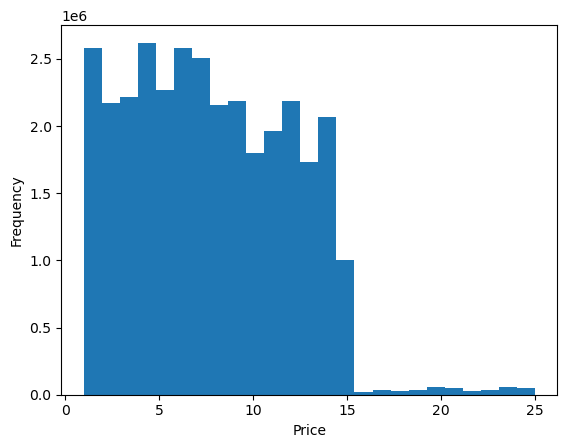

In [10]:
hist = ords_prods_cust['prices'].plot.hist(bins = 25)
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

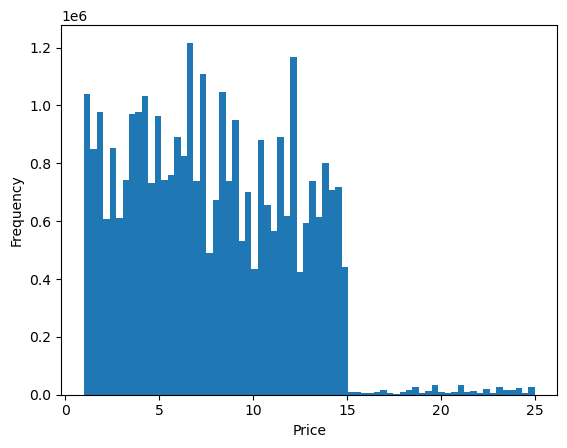

In [11]:
#  To increase the level of granularity: Set number of bins to 70
hist_1 = ords_prods_cust['prices'].plot.hist(bins = 70)
plt.xlabel('Price')
plt.ylabel('Frequency')

#### Scatterplot

Text(46.972222222222214, 0.5, 'Frequency')

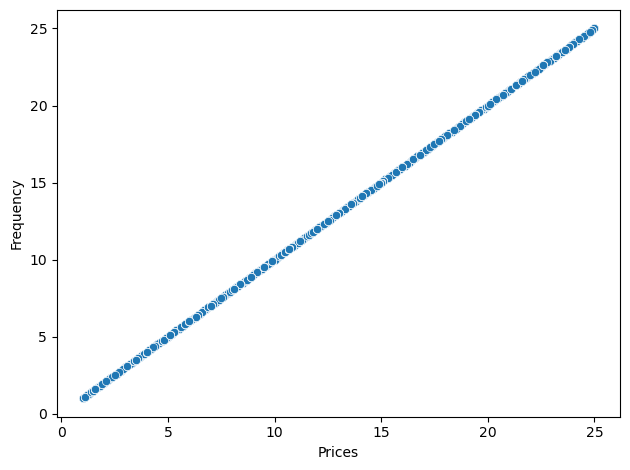

In [14]:
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Prices')
plt.ylabel('Frequency')

#### Line Chart

In [15]:
# Create a sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [16]:
# Store 70% of the sample in the dataframe big
big = ords_prods_cust[dev]

In [17]:
# Store 30% of the sample in the dataframe small
small  = ords_prods_cust[~dev]

In [18]:
# Check that the sample has been created correctly
len(ords_prods_cust)

32433030

In [19]:
len(big)+len(small)

32433030

In [21]:
#Reduce sample to only the necessary columns 
df_2 = small[['orders_day_of_week','prices']]

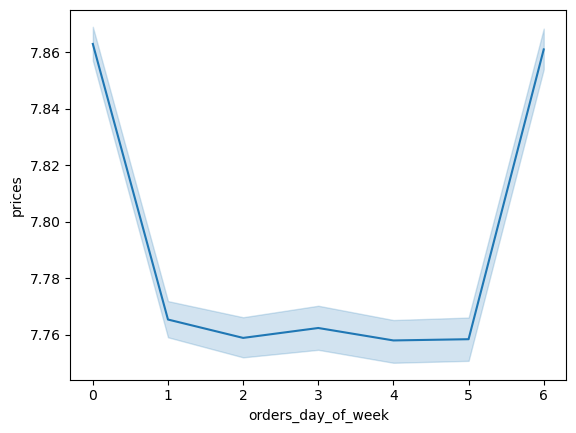

In [22]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

### 03. Create a histogram of the “order_hour_of_day” column

Text(42.597222222222214, 0.5, 'Orders')

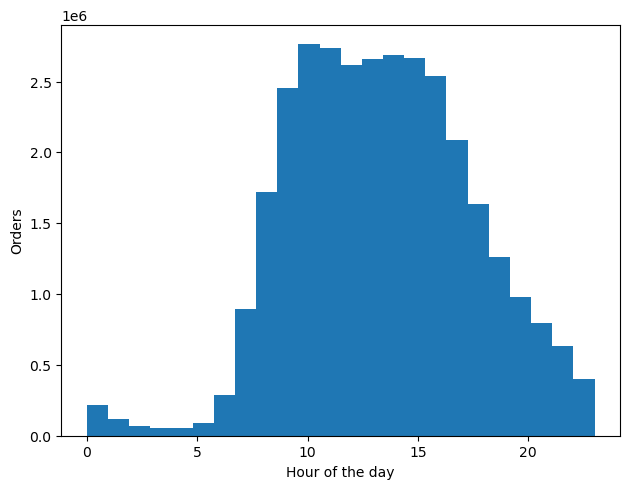

In [23]:
hist_orders_hour_of_day = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Hour of the day')
plt.ylabel('Orders')

The histogram indicates that the busiest hour for Instacart is 10 AM, at this point in the day the number of orders reaches its peak. However, before 10 AM there is a notable increase in orders starting at 9 AM. 
From this hour on, a relatively high level of orders remains consistent until 4 PM. 
From 5 PM the orders decrease steadily for the rest of the day.

### 04. Create a bar chart from the “loyalty_flag” column.

Text(42.597222222222214, 0.5, 'Frequency')

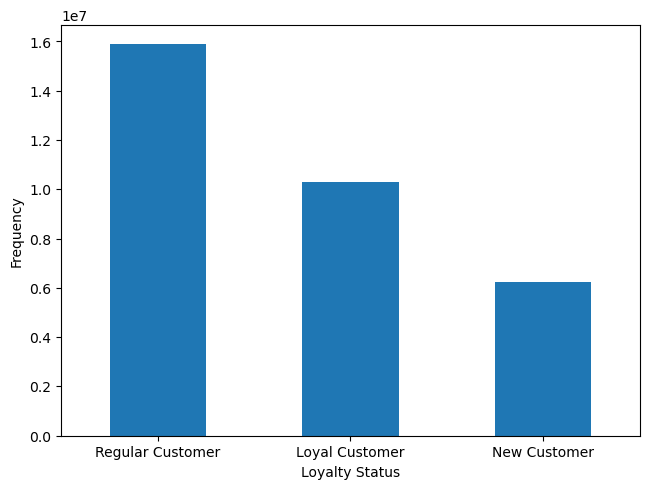

In [24]:
loyalty_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()
plt.xticks(rotation=0) 
plt.tight_layout()
plt.xlabel('Loyalty Status')
plt.ylabel('Frequency')

The loyalty flag bar chart illustrates the distribution of customers based on their order frequency. The majority have made between 10 and 40 orders and are classified as "Regular Customers", followed by "Loyal Customers" who represent around 37% less customers compared to the "Regular Customers". Lastly, the group with less than 10 orders or "New Customers" are the least frequent type of customers.

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [25]:
#Reduce the already created sample to only the necessary columns 
df_htd = small[['order_hour_of_day','prices']]

Text(24.847222222222214, 0.5, 'Prices')

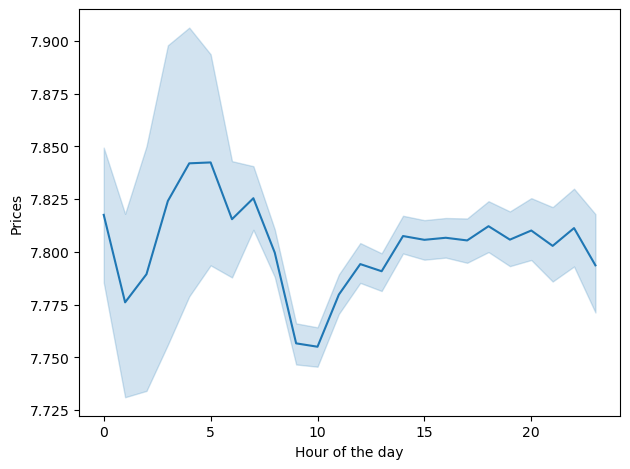

In [26]:
# Create line chart
line_htd = sns.lineplot(data = df_htd, x = 'order_hour_of_day',y = 'prices')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Hour of the day')
plt.ylabel('Prices')

### 06. Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [27]:
#Reduce the already created sample to only the necessary columns 
df_nod = small[['age','number_of_dependants']]

Text(33.722222222222214, 0.5, 'Number of dependants')

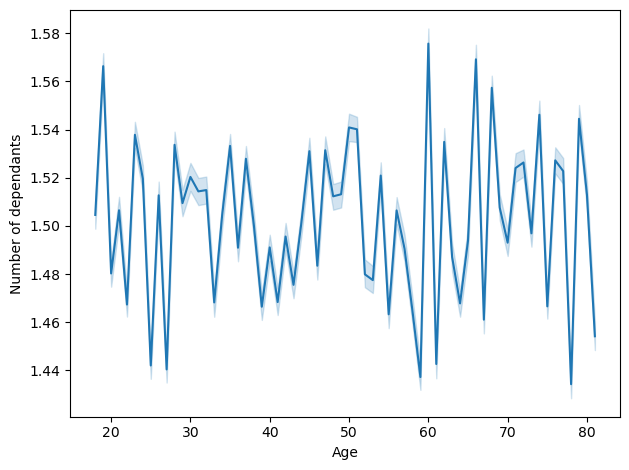

In [28]:
# Create line chart
line_nod = sns.lineplot(data = df_nod, x='age',y='number_of_dependants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Age')
plt.ylabel('Number of dependants')

The line chart shows that there is no apparent correlation between age and family situation. The number of dependants exhibits significant fluctuations among customers of similar ages. For example, around the age of 60, both one of the lowest and the highest number of dependants are observed.

### 07. Explore whether there’s a connection between age and spending power (income)  by creating a scatterplot 

Text(11.472222222222216, 0.5, 'Income')

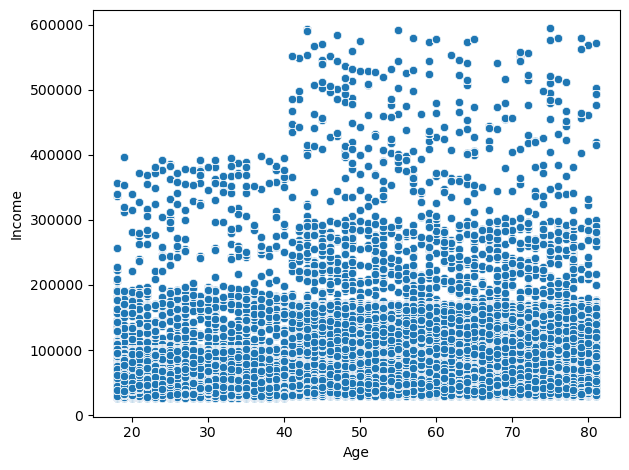

In [42]:
scatter_age= sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust)
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel('Age')
plt.ylabel('Income')

The scatter plot reveals that the majority of customers, regardless of age, have incomes ranging from 0 to 200k Additionally, a significant portion of customers show incomes up to 300k. However, among customers ages 18 to 40, there is a small group reaching incomes as high as 400k. 
As the age progresses beyond 40, a larger proportion of customers have incomes up to 300k, with a few falling within the range of 300k to 600k.There is a clear relationship between age and income, where younger customers exhibit an income max that is significantly lower than the one for older generations.

### 08. Export your visualizations as “.png” files in your relevant project folder.

In [43]:
#Export bar chart for order_day_of_week column
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'), bbox_inches='tight')

In [44]:
#Export bar chart for order_day_of_week column,  not sorted
bar_ns.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_ns.png'), bbox_inches='tight')

In [45]:
#Export bar chart for order_day_of_week column,  with color
bar_color.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_colors.png'), bbox_inches='tight')

In [46]:
#Export price histogram (25 bins)
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price_25.png'), bbox_inches='tight')

In [47]:
#Export price histogram (70 bins)
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price_70.png'), bbox_inches='tight')

In [48]:
#Export price scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_price_.png'), bbox_inches='tight')

In [49]:
#Export line chart of prices vs order_day_of_week
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_dow.png'), bbox_inches='tight')

In [50]:
#Export Histogram for order_hour_of_day
hist_orders_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'), bbox_inches='tight')

In [51]:
#Export Loyalty flag bar chart
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'), bbox_inches='tight')

In [52]:
#Export hour_of_the_day vs price line chart
line_htd.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_htd.png'), bbox_inches='tight')

In [53]:
#Export age vs number_of_dependents line chart
line_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_nod.png'), bbox_inches='tight')

In [54]:
#Export age vs income scatterplot
scatter_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age.png'), bbox_inches='tight')